## Programming Analytics Final Project: Proposal and Data Exploration

### Team Members:

* Vel (Tien-Yun) Wu
* Yuttawee Kongtananan
* Eva (Yi-Ting) Huang

## Data of interest
1. Insurance Coverage.

2. Spending per Household.

3. The expense paid for by insurance companies for their customers.

Source of Data:
`HIC-4. Health Insurance Coverage Status and Type of Coverage by State--All Persons: 2008 to 2018 `.
Can be downloaded from:
https://www.census.gov/library/publications/2019/demo/p60-267.html#


Some news:
https://www.vox.com/policy-and-politics/2019/9/10/20858938/health-insurance-census-bureau-data-trump?fbclid=IwAR2s1_ur8ElTtcGjPHKl1zN7D0slSoTbLggHBFRR8X-awwF_YLCJIgvn_4Q


Some other sources:
https://www.cdc.gov/nchs/nhis/nhis_2017_data_release.htm?fbclid=IwAR2s1_ur8ElTtcGjPHKl1zN7D0slSoTbLggHBFRR8X-awwF_YLCJIgvn_4Q

### Data Assemblage: Health Insurance Coverage Status and Type of Coverage by State--All Persons:2008 to 2018

In [83]:
%matplotlib inline 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import PIL.Image as Image

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

import scipy
import scipy.misc
import scipy.cluster
import random

from pandas.io.json import json_normalize

In [2]:
# Read in the data and drop Excel sheet comment blocks
hc_converage_2008_2018 = pd.read_excel('hic04_acs.xls', skiprows = [0, 1, 2]).dropna(thresh = 2)

# Prepare the headers by year and sub-section
years = list(range(2018, 2007, -1))
each_year_sub = ['Estimate_number', 'Margin_of_Error_number', 'Percentage', 'Margin_of_Error_percentage']

headers_for_hc_coverage_census = ['Nation/State', 'Coverage Type']

for each in years:
    for each_sub in each_year_sub:
        headers_for_hc_coverage_census.append(str(each) + '_' + each_sub)

# Assign headers to data
hc_converage_2008_2018.columns = headers_for_hc_coverage_census
hc_converage_2008_2018 = hc_converage_2008_2018[hc_converage_2008_2018['Coverage Type'].notna()].ffill(axis=0)
hc_converage_2008_2018

,Nation/State,Coverage Type,2018_Estimate_number,2018_Margin_of_Error_number,2018_Percentage,2018_Margin_of_Error_percentage,2017_Estimate_number,2017_Margin_of_Error_number,2017_Percentage,2017_Margin_of_Error_percentage,...,2010_Percentage,2010_Margin_of_Error_percentage,2009_Estimate_number,2009_Margin_of_Error_number,2009_Percentage,2009_Margin_of_Error_percentage,2008_Estimate_number,2008_Margin_of_Error_number,2008_Percentage,2008_Margin_of_Error_percentage
1,UNITED STATES,Total,322249,15,100.0,Z,320775,15,100,Z,...,100.0,Z,301472,23,100.0,Z,298571,20,100.0,Z
2,UNITED STATES,Any coverage,293684,178,91.1,0.1,292756,184,91.3,0.1,...,84.5,0.1,255807,235,84.9,0.1,255068,230,85.4,0.1
3,UNITED STATES,Uninsured,28566,183,8.9,0.1,28019,188,8.7,0.1,...,15.5,0.1,45665,238,15.1,0.1,43503,233,14.6,0.1
4,UNITED STATES,Private,217623,404,67.5,0.1,216952,419,67.6,0.1,...,65.8,0.1,203300,379,67.4,0.1,207786,353,69.6,0.1
5,UNITED STATES,..Employer-based,177740,354,55.2,0.1,176319,358,55,0.1,...,54.9,0.1,170633,310,56.6,0.1,175294,308,58.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,WYOMING,..TRICARE,23,4,4.1,0.6,20,3,3.6,0.6,...,3.7,0.7,21,3,3.9,0.5,20,3,3.8,0.6
569,WYOMING,Public,155,6,27.3,1,161,6,28.3,1.1,...,26.0,1.1,134,5,25.1,0.9,129,5,24.6,1
570,WYOMING,..Medicaid,58,5,10.3,0.9,69,6,12.2,1,...,12.8,1,64,5,12.0,0.9,60,5,11.4,0.9
571,WYOMING,..Medicare,102,3,18.0,0.4,98,2,17.3,0.4,...,13.3,0.4,73,2,13.7,0.5,70,2,13.5,0.3


### Exploration 1. Health Insurance Coverage: Percentages

In [28]:
hc_converage_2008_2018_estimate_percentages_only = hc_converage_2008_2018.iloc[0:, [0, 1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]]
hc_converage_2008_2018_estimate_percentages_only

,Nation/State,Coverage Type,2018_Percentage,2017_Percentage,2016_Percentage,2015_Percentage,2014_Percentage,2013_Percentage,2012_Percentage,2011_Percentage,2010_Percentage,2009_Percentage,2008_Percentage
1,UNITED STATES,Total,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,UNITED STATES,Any coverage,91.1,91.3,91.4,90.6,88.3,85.5,85.2,84.9,84.5,84.9,85.4
3,UNITED STATES,Uninsured,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
4,UNITED STATES,Private,67.5,67.6,67.8,67.5,66.4,65.0,65.1,65.2,65.8,67.4,69.6
5,UNITED STATES,..Employer-based,55.2,55,54.7,54.4,54.2,54.0,54.6,54.7,54.9,56.6,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,WYOMING,..TRICARE,4.1,3.6,3.3,3.4,3.3,3.6,3.5,3.9,3.7,3.9,3.8
569,WYOMING,Public,27.3,28.3,27.3,26.4,26.0,25.2,27.5,24.9,26.0,25.1,24.6
570,WYOMING,..Medicaid,10.3,12.2,12.1,12.0,12.5,11.0,13.9,11.5,12.8,12.0,11.4
571,WYOMING,..Medicare,18.0,17.3,16.3,15.5,15.0,14.6,14.8,14.3,13.3,13.7,13.5


### Data Cleaning

In [36]:
# Inspect only the "Uninsured" percentage, including a nationwide one
hc_uninsured_perc = hc_converage_2008_2018_estimate_percentages_only[hc_converage_2008_2018_estimate_percentages_only['Coverage Type'] == 'Uninsured']
hc_uninsured_perc = hc_uninsured_perc.drop(['Coverage Type'], axis = 1).reset_index().drop(['index'], axis = 1).replace("N", np.nan).bfill(axis=1).astype(
    {'2018_Percentage': 'float64', 
     '2017_Percentage': 'float64',
     '2016_Percentage': 'float64',
     '2015_Percentage': 'float64',
     '2014_Percentage': 'float64',
     '2013_Percentage': 'float64',
     '2012_Percentage': 'float64',
     '2011_Percentage': 'float64',
     '2010_Percentage': 'float64',
     '2009_Percentage': 'float64',
     '2008_Percentage': 'float64'
    })
hc_uninsured_perc

,Nation/State,2018_Percentage,2017_Percentage,2016_Percentage,2015_Percentage,2014_Percentage,2013_Percentage,2012_Percentage,2011_Percentage,2010_Percentage,2009_Percentage,2008_Percentage
0,UNITED STATES,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
1,ALABAMA,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
2,ALASKA,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
3,ARIZONA,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
4,ARKANSAS,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
5,CALIFORNIA,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
6,COLORADO,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
7,CONNECTICUT,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
8,DELAWARE,5.7,5.7,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
9,DISTRICT OF COLUMBIA,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


In [38]:
hc_uninsured_perc.dtypes

Nation/State        object
2018_Percentage    float64
2017_Percentage    float64
2016_Percentage    float64
2015_Percentage    float64
2014_Percentage    float64
2013_Percentage    float64
2012_Percentage    float64
2011_Percentage    float64
2010_Percentage    float64
2009_Percentage    float64
2008_Percentage    float64
dtype: object

In [67]:
# The same table, but flipped around

hc_uninsured_perc_flipped = hc_uninsured_perc.transpose().reset_index()
hc_uninsured_perc_flipped.columns = hc_uninsured_perc_flipped.iloc[0]
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped.rename({'Nation/State': 'Years'}, axis=1)
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis = 1)
hc_uninsured_perc_flipped['Years'] = hc_uninsured_perc_flipped['Years'].str.rstrip('egatnecreP_').astype({'Years': 'int'})
hc_uninsured_perc_flipped

,Years,UNITED STATES,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,2008,14.6,13.3,19.1,18,17.1,17.3,16.7,8.8,10,...,11.1,12.9,23.4,15,8.8,11.6,12.5,14.8,8.8,13.7
1,2009,15.1,13.8,21.1,17.3,17,18,15.8,8.8,10.2,...,13.1,14.3,23.8,14.6,8.6,11.9,13.4,14.2,9.4,15.2
2,2010,15.5,14.6,19.9,16.9,17.5,18.5,15.9,9.1,9.7,...,12.4,14.4,23.7,15.3,8,13.1,14.2,14.6,9.4,14.9
3,2011,15.1,14.3,20.1,17.2,17.1,18.1,15.1,8.8,9.4,...,11.9,14.6,23,15.3,6.6,12.5,14.2,14.9,9,15.4
4,2012,14.8,13.3,20.5,17.6,16.4,17.9,14.7,9.1,8.8,...,11.5,13.9,22.5,14.5,6.5,12.5,13.9,14.4,9,15.4
5,2013,14.5,13.6,18.5,17.1,16,17.2,14.1,9.4,9.1,...,11.3,13.9,22.1,14,7.2,12.3,14,14,9.1,13.4
6,2014,11.7,12.1,17.2,13.6,11.8,12.4,10.3,6.9,7.8,...,9.8,12,19.1,12.5,5,10.9,9.2,8.6,7.3,12
7,2015,9.4,10.1,14.9,10.8,9.5,8.6,8.1,6,5.9,...,10.2,10.3,17.1,10.5,3.8,9.1,6.6,6,5.7,11.5
8,2016,8.6,9.1,14,10,7.9,7.3,7.5,4.9,5.7,...,8.7,9,16.6,8.8,3.7,8.7,6,5.3,5.3,11.5
9,2017,8.7,9.4,13.7,10.1,7.9,7.2,7.5,5.5,5.7,...,9.1,9.5,17.3,9.2,4.6,8.8,6.1,6.1,5.4,12.3


Text(0, 0.5, 'Percentage of Uninsured People')

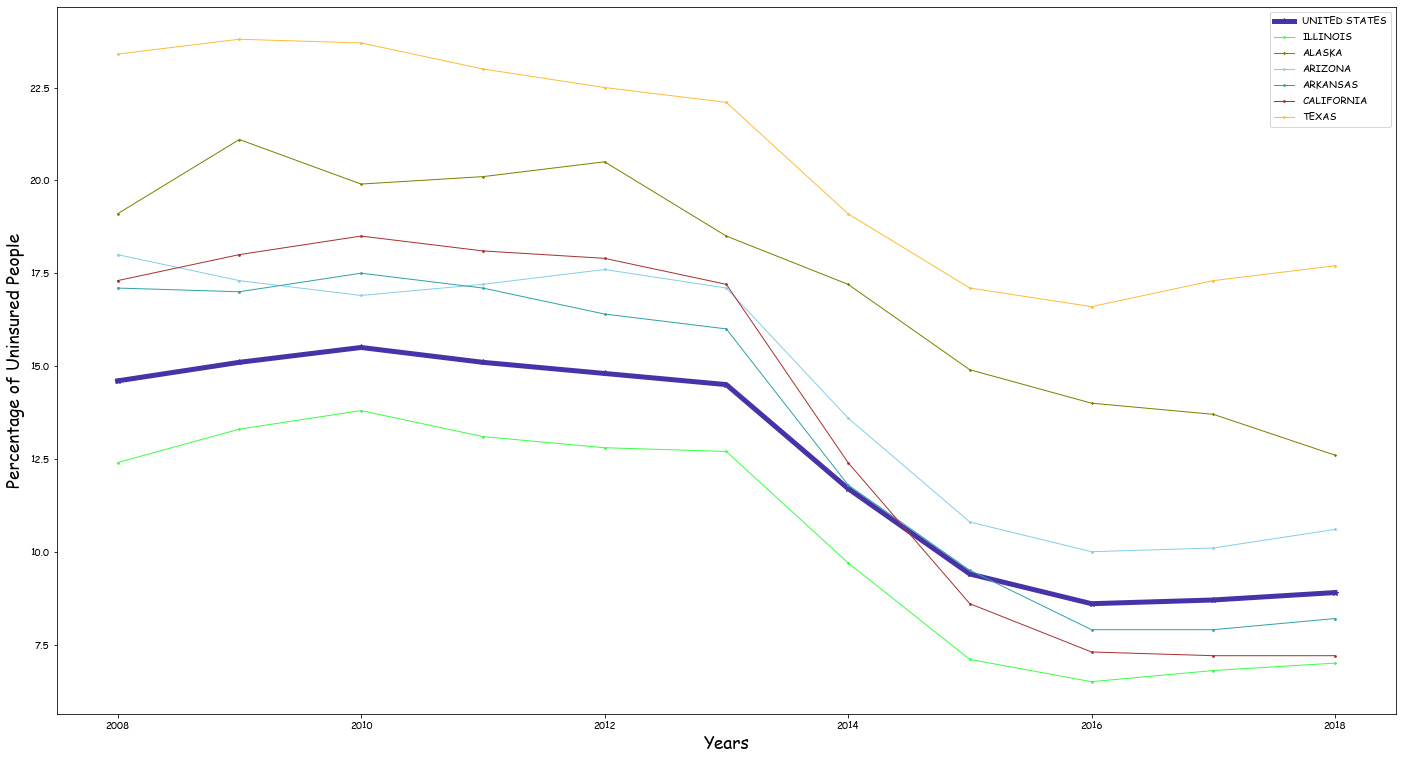

In [76]:
plt.figure(figsize=(24,13))
plt.plot( 'Years', 'UNITED STATES', data=hc_uninsured_perc_flipped, marker='*', color='#4832a8', linewidth=5)
plt.plot( 'Years', 'ILLINOIS', data=hc_uninsured_perc_flipped, marker='*', markersize=2, color='#3dff47', linewidth=1)
plt.plot( 'Years', 'ALASKA', data=hc_uninsured_perc_flipped, marker='*', markersize=2, color='olive', linewidth=1)
plt.plot( 'Years', 'ARIZONA', data=hc_uninsured_perc_flipped, marker='p', markersize=2, color='skyblue', linewidth=1)
plt.plot( 'Years', 'ARKANSAS', data=hc_uninsured_perc_flipped, marker='p', markersize=2, color='#32a2a8', linewidth=1)
plt.plot( 'Years', 'CALIFORNIA', data=hc_uninsured_perc_flipped, marker='p', markersize=2, color='#a83232', linewidth=1)
plt.plot( 'Years', 'TEXAS', data=hc_uninsured_perc_flipped, marker='p', markersize=2, color='#ffbb3d', linewidth=1)
plt.legend()
plt.xlabel('Years', fontsize = 'xx-large')
plt.ylabel('Percentage of Uninsured People', fontsize = 'xx-large')

Text(0, 0.5, 'Percentage of Uninsured People')

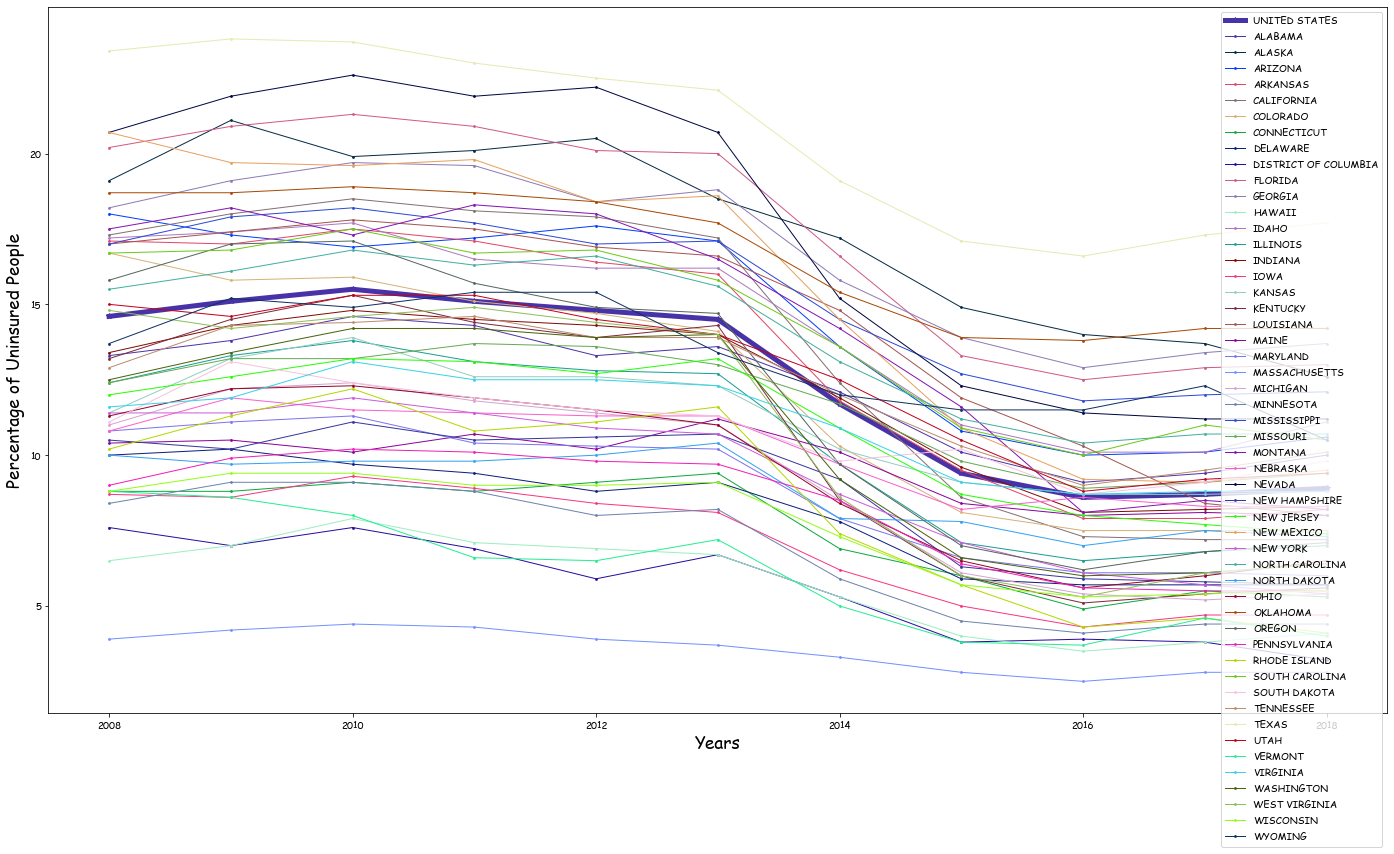

In [84]:
# Plotting them all but this is not so readable~~

plt.figure(figsize=(24,13))
plt.plot( 'Years', 'UNITED STATES', data=hc_uninsured_perc_flipped, marker='*', color='#4832a8', linewidth=5)
for each_state in hc_uninsured_perc_flipped.columns[2:]:
    plt.plot( 'Years', each_state, data=hc_uninsured_perc_flipped, marker='p', markersize=2, color=(random.random(), random.random(), random.random()), linewidth=1)
plt.legend()
plt.xlabel('Years', fontsize = 'xx-large')
plt.ylabel('Percentage of Uninsured People', fontsize = 'xx-large')

### Exploration 2. Population Changes

In [4]:
population_2008_2018 = pd.read_excel('hic04_acs.xls').dropna().drop(['Unnamed: 1'], axis = 1).reset_index().drop(['index'], axis = 1)

years = list(range(2018, 2007, -1))
each_year_sub = ['Estimate_number', 'Margin_of_Error_number', 'Percentage', 'Margin_of_Error_percentage']

headers_for_hc_coverage_census = ['State']

for each in years:
    for each_sub in each_year_sub:
        headers_for_hc_coverage_census.append(str(each) + '_' + each_sub)

population_2008_2018.columns = headers_for_hc_coverage_census
population_2008_2018 = population_2008_2018.iloc[0:, [0, 1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41]]
population_2008_2018

,State,2018_Estimate_number,2017_Estimate_number,2016_Estimate_number,2015_Estimate_number,2014_Estimate_number,2013_Estimate_number,2012_Estimate_number,2011_Estimate_number,2010_Estimate_number,2009_Estimate_number,2008_Estimate_number
0,UNITED STATES,322249,320775,318176,316451,313890,311158,308896,306561,304288,301472,298571
1,ALABAMA,4810,4794,4783,4781,4767,4755,4742,4720,4703,4616,4575
2,ALASKA,713,716,718,713,712,712,709,699,689,678,659
3,ARIZONA,7065,6908,6825,6719,6623,6521,6444,6378,6310,6502,6403
4,ARKANSAS,2961,2949,2934,2924,2914,2907,2896,2885,2868,2833,2802
5,CALIFORNIA,39062,39047,38764,38650,38297,37832,37524,37162,36816,36377,36160
6,COLORADO,5604,5514,5448,5367,5266,5173,5095,5025,4957,4930,4853
7,CONNECTICUT,3524,3537,3525,3538,3541,3541,3535,3523,3520,3457,3441
8,DELAWARE,952,N,938,931,921,912,903,892,885,869,856
9,DISTRICT OF COLUMBIA,693,684,671,661,648,636,621,608,594,589,580


In [ ]:
#### {{DATA VIZ PENDING!!!!}}